In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters model I
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
#parameters model II
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

In [3]:
R = np.linspace(0.1,15.,100)

In [4]:
def Integral_v2(x,a,zp,R,z=0,R_d=R_d_I,R_m=R_m,z_g=0.08):
    d = np.sqrt((z-zp)**2. + (a+R)**2.) + np.sqrt((z-zp)**2. + (a-R)**2.)
    u = 2.*a/d
    t1 = ((2.*R_d*R_m)/(a**2.*x**2.)-1.)
    f_x = t1*np.exp(-(a*x)/(2.*R_d) -(R_m)/(a*x))/np.sqrt(x**2. - 1.)
    t2 = (a+R)/np.sqrt((z-zp)**2. + (a+R)**2.) - (a-R)/np.sqrt((z-zp)**2. + (a-R)**2.)
    f_a = a*u*t2/(d*np.sqrt(1.-u**2.))
    f_zp = np.exp(-abs(zp)/z_g)
    return R*f_zp*f_a*f_x

In [5]:
I_ISM_v2 = []
for i in range (0,len(R)):
    integrando = lambda x,a,zp: Integral_v2(x,a,zp,R[i])
    result = integrate.tplquad(integrando,-np.inf,np.inf,lambda zp: 0.1, lambda zp: np.inf,lambda zp,a: 1.,lambda zp,a: np.inf)[0]
    I_ISM_v2.append(result)
print I_ISM_v2

/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


[0.0002443828813661988, 0.0021636748680588895, 0.005836336582096259, 0.011644149744113787, 0.01984804013075041, 0.03020845767682684, 0.04198902458544077, 0.05422418639597686, 0.06596656380481501, 0.076423827960141, 0.0850049047402956, 0.09131461999373756, 0.09512569636347089, 0.09634450595544194, 0.09497845964683856, 0.09110809728519594, 0.0848645255349385, 0.07641189141844285, 0.06593406023662508, 0.053624734378508274, 0.03968025373806835, 0.024294455982652337, 0.00765511790642662, -0.010058441314925046, -0.028676874834068847, -0.04804168206842676, -0.06800561105488624, -0.08843272256548303, -0.10919821730951541, -0.13018809589661248, -0.15129870986211308, -0.17243624234506344, -0.19351614723896213, -0.2144625732938198, -0.2352077854822967, -0.25569159177115447, -0.27586078883699366, -0.29566863187703407, -0.3150743255352001, -0.3340425426563899, -0.35254297550541946, -0.37054990639591034, -0.3880418154783244, -0.40500100682375934, -0.4214132666859452, -0.43726754460911865, -0.4525556

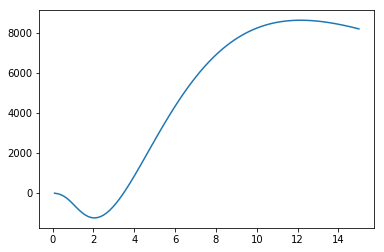

In [18]:
ISM_array_v2 = np.array(I_ISM_v2)
const = -G*Sigma_g_ISM_I/(0.08*R_d_I)
plt.plot(R,const*ISM_array_v2)

In [7]:
def Vc2_ISM(R,R_g,R_m,Sigma_g):
    def Integral_ISM(h,s,R):
        t1 = 1./np.sqrt(1.-s**2.)
        t2 = 1./np.sqrt(h**2. - 1.)
        t3 = np.exp(-(R*s*h)/R_g - R_m/(R*h*s))
        t4 = (R_m*R_g)/(R**2.*h**2.) - s**2.
        result = t1*t2*t3*t4
        return R**2.*result
    Integral_ISM_res = []
    for i in range (0,len(R)):
        integrando = lambda h,s: Integral_ISM(h,s,R[i])
        resultado = integrate.dblquad(integrando,0.1,1.,lambda s: 1., lambda s: np.inf)[0]
        Integral_ISM_res.append(resultado)
    return -4.*G*Sigma_g*np.array(Integral_ISM_res)/R_g

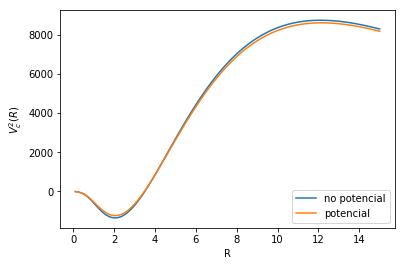

In [19]:
plt.plot(R,Vc2_ISM(R,R_g=2.*R_d_I,R_m=R_m,Sigma_g=Sigma_g_ISM_I),label='no potencial')
plt.plot(R,const*ISM_array_v2,label='potencial')
plt.ylabel(r'$V_{c}^{2}(R)$')
plt.xlabel('R')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('ISMPotential_not_I.pdf')

In [9]:
def Integral_v3(x,a,zp,R,z=0,R_d=R_d_II,R_m=R_m,z_g=0.08):
    d = np.sqrt((z-zp)**2. + (a+R)**2.) + np.sqrt((z-zp)**2. + (a-R)**2.)
    u = 2.*a/d
    t1 = ((2.*R_d*R_m)/(a**2.*x**2.)-1.)
    f_x = t1*np.exp(-(a*x)/(2.*R_d) -(R_m)/(a*x))/np.sqrt(x**2. - 1.)
    t2 = (a+R)/np.sqrt((z-zp)**2. + (a+R)**2.) - (a-R)/np.sqrt((z-zp)**2. + (a-R)**2.)
    f_a = a*u*t2/(d*np.sqrt(1.-u**2.))
    f_zp = np.exp(-abs(zp)/z_g)
    return R*f_zp*f_a*f_x

In [10]:
I_ISM_v3 = []
for i in range (0,len(R)):
    integrando = lambda x,a,zp: Integral_v3(x,a,zp,R[i])
    result = integrate.tplquad(integrando,-np.inf,np.inf,lambda zp: 0.1, lambda zp: np.inf,lambda zp,a: 1.,lambda zp,a: np.inf)[0]
    I_ISM_v3.append(result)
print I_ISM_v3

[0.0005477800211614752, 0.004831825354510798, 0.01296026061641201, 0.02565654865814206, 0.043474461173147044, 0.06613664841324912, 0.09248248613056616, 0.12088237463938602, 0.14965173381388408, 0.17729877525992388, 0.20262527282603132, 0.22473867407011203, 0.24302157277716846, 0.25708594354374265, 0.2667261127951333, 0.2718765737152787, 0.27257661939030353, 0.26894184660731024, 0.2611417512030357, 0.24938241926536783, 0.2338933377364555, 0.2149174483384451, 0.1927037236177453, 0.167501701200791, 0.1395575164343406, 0.10911107113014483, 0.07639406568491203, 0.041628693068789364, 0.0050268224048797125, -0.03321045458530497, -0.07289299421734699, -0.11384157882981354, -0.1558877469031983, -0.19887351183586513, -0.2426510293348962, -0.28708219057089485, -0.3320382055740894, -0.37739916628102005, -0.4230536003266099, -0.4688980301640967, -0.5148365392907952, -0.5607803493654223, -0.6066474128596002, -0.6523620171172854, -0.6978544115040264, -0.7430604496802243, -0.7879212427683658, -0.83238

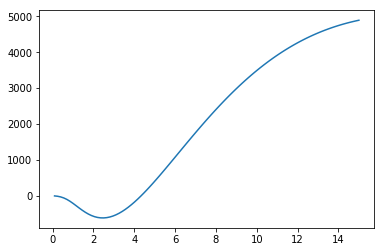

In [13]:
ISM_array_v3 = np.array(I_ISM_v3)
constII = -G*Sigma_g_ISM_II/(0.08*R_d_II)
plt.plot(R,constII*ISM_array_v3)

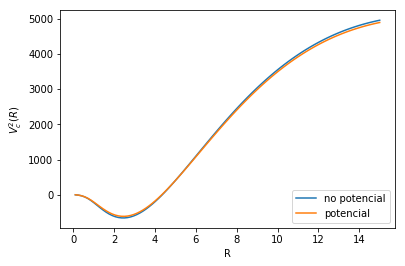

In [17]:
plt.plot(R,Vc2_ISM(R,R_g=2.*R_d_II,R_m=R_m,Sigma_g=Sigma_g_ISM_II),label='no potencial')
plt.plot(R,constII*ISM_array_v3,label='potencial')
plt.ylabel(r'$V_{c}^{2}(R)$')
plt.xlabel('R')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('ISMPotential_not_II.pdf')

In [22]:
def Vc2_ISM_aprox(R,R_g,Sigma_g_ISM,R_m=R_m):
    def M_g_ISM(u,R):
        return R*u*np.exp(-((R*u)/(R_g))-(R_m/(R*u)))
    Integral_M_g = []
    for i in range (0,len(R)):
        result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
        Integral_M_g.append(result)
    return 2.*np.pi*Sigma_g_ISM*G*np.array(Integral_M_g)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 10: ordinal not in range(128)

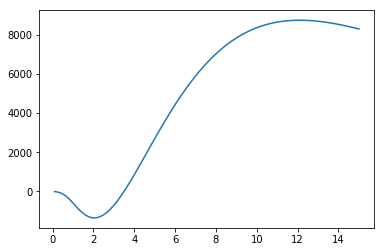

In [24]:
plt.plot(R,Vc2_ISM(R,R_g=2.*R_d_I,R_m=R_m,Sigma_g=Sigma_g_ISM_I),label='exacto')
plt.plot(R,Vc2_ISM_aprox(R,R_g=2.*R_d_I,Sigma_g_ISM=Sigma_g_ISM_I,R_m=R_m),label='aproximación')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}^{2}/(km s^{-1})^{2}$')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('ISM_approx_exact_I.pdf')

In [ ]:
plt.plot(R,Vc2_ISM(R,R_g=2.*R_d_II,R_m=R_m,Sigma_g=Sigma_g_ISM_II),label='exacto')
plt.plot(R,Vc2_ISM_aprox(R,R_g=2.*R_d_II,Sigma_g_ISM=Sigma_g_ISM_II,R_m=R_m),label='aproximación')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}^{2}/(km s^{-1})^{2}$')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('ISM_approx_exact_II.pdf')

In [18]:
temp=const*ISM_array_v2
w=temp<0
temp[w]=0
print temp

[    0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.           404.63735317
  1153.63149882  1932.65123941  2735.77282962  3557.52762002
  4392.89510563  5237.28924672  6086.54040714  6936.87446275
  7784.89023917  8627.53634424  9462.08789035 10286.12343423
 11097.50267886 11894.34514467 12675.00969024 13438.07515236
 14182.32229226 14906.71652254 15610.39212906 16292.63722878
 16952.88002209 17590.67596426 18205.69580559 18797.71460574
 19366.60161378 19912.31082602 20434.87236281 20934.38447953
 21411.00627655 21864.95099971 22296.47975759 22705.89595421
 23093.54003632 23459.78476824 23805.03086203 24129.70304015
 24434.2462613  24719.12263458 24984.80825927 25231.79051807
 25460.56557679 25671.63613627 25865.50940362 26042.69523243
 26

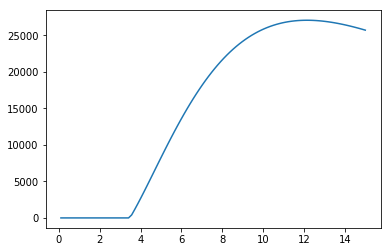

In [39]:
plt.plot(R,temp)

In [28]:
from scipy.special import kn

In [29]:
def Vc2_b(R,rho_b,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b):
    def I_b(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = R**2.*(R/a_b)**(-alpha_b)
        return (t*n)/d
    Integral_b = []
    for i in range (0,len(R)):
        result = integrate.quad(I_b,0,1,args=(R[i]))[0]
        Integral_b.append(result)
    return 4.*np.pi*G*q_b*rho_b*np.array(Integral_b)

In [30]:
 def Vc2_DM(R,a_h,rho_h,alpha_h,beta_h,q_h=q_h):
    def I_h(x,R):
        e = np.sqrt(1.- q_h**2.)
        n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
        d = np.sqrt(1-x**2.*e**2)
        t = R**2.*(R/a_h)**(-alpha_h)
        result = (t*n)/d
        return result
    Integral_DM = []
    for i in range (0,len(R)):
        result = integrate.quad(I_h,0,1,args=(R[i]))[0]
        Integral_DM.append(result)
    return 4.*np.pi*G*q_h*rho_h*np.array(Integral_DM)

In [31]:
def Vc2_SD_simps(R,R_d,Sigma_d_SD,z=0.,alpha_0=0.5,z1=1.,z0=0.3):
    def I_SD(zp,a,R):
        d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
        u = (2.*a)/d
        t2 = u/np.sqrt(1-u**2.)
        t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
        g = -a*kn(0,a/R_d)*t2*t1/d
        f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
        return R*f*g
    Integral_SD_sims = []
    a_lims = np.linspace(0.1, 20.0,2*len(R))#200
    zp_lims = np.linspace(-20.0,20.0,4*len(R))#400
    fun_zp = np.zeros(len(zp_lims))
    for k in range(0,len(R)):
        for i in range(0,len(zp_lims)):
            fun_zp[i] = integrate.simps(I_SD(zp_lims[i],a_lims,R[k]),a_lims)
        result = integrate.simps(fun_zp,zp_lims)
        Integral_SD_sims.append(result)
    return -4.*G*Sigma_d_SD*np.array(Integral_SD_sims)/R_d

In [32]:
def Vc_tot_v5(R,parameters):
    R_d,Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_simps(R,R_d,Sigma_d_SD) + temp
    return np.sqrt(suma)

In [33]:
params_Model_I=np.array([R_d_I,Sigma_d_SD_I,rho_b_I,a_h_I,rho_h_I,alpha_h_I,beta_h_I,Sigma_g_ISM_I])
params_Model_II=np.array([R_d_II,Sigma_d_SD_II,rho_b_II,a_h_II,rho_h_II,alpha_h_II,beta_h_II,Sigma_g_ISM_II])

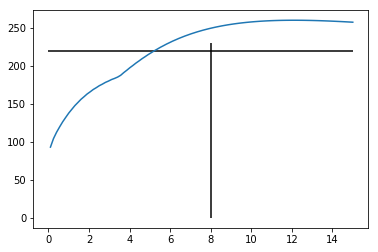

In [34]:
plt.plot(R,Vc_tot_v5(R,params_Model_I))
#plt.plot(R,Vc_tot_v5(R,params_Model_I))
plt.hlines(220,0,15)
plt.vlines(8,0.,230)

In [43]:
Inte_array_I = np.array([1.8486242949410916, -0.030429802579155632, -0.3730234337108855, -0.45629550597869517, -0.4671763766632058, -0.45445278450445, -0.43418223710579773, -0.41235508831314893, -0.39131073995077864, -0.37191634031322546, -0.35440918939194876, -0.3387537145717306, -0.3248020684306714, -0.3123686603013777, -0.3012647601755696, -0.29131387633748235, -0.2823577279403126, -0.2742576225394643, -0.2668936692881578, -0.26016306378089027, -0.2539780722229316, -0.24826401956500244, -0.24295742601081202, -0.23800434945848936, -0.23335893810512287, -0.22898219060394023, -0.2248409000729719, -0.220906758562525, -0.21715560398312916, -0.21356678221411052, -0.21012261142896152, -0.2068079321128098, -0.20360972571036695, -0.20051679433451133, -0.1975194902696519, -0.19460948714104948, -0.19177958615765672, -0.1890235512777571, -0.18633597008096045, -0.18371213664659594, -0.18114794876740045, -0.17863982318630137, -0.17618462167611632, -0.17377958931382922, -0.17142229852195648, -0.16911060627382393, -0.16684261208400136, -0.16461662527853713, -0.1624311364664698, -0.16028479095839782, -0.15817636936948387, -0.15610476684602073, -0.1540689800362571, -0.15206809035882243, -0.15010125415847395, -0.14816769179184294, -0.14626667905276552, -0.14439753986667417, -0.14255963919340772, -0.1407523783576228, -0.13897518834533007, -0.1372275285188611, -0.13550888079258191, -0.1338187468751755, -0.13215664685500744, -0.1305221157744266, -0.12891470206955433, -0.12733396630122576, -0.12577947889775748, -0.12425082019269837, -0.12274757830806744, -0.12126934894440175, -0.1198157341195289, -0.11838634192371608, -0.11698078728130566, -0.11559868925740424, -0.1142396719953409, -0.11290336455758557, -0.11158939940051843, -0.11029741408281396, -0.1090270508344688, -0.1077779544922705, -0.10654977469535068, -0.10534216449405819, -0.10415478161492403, -0.10298728625823461, -0.10183934404903665, -0.10071062285251349, -0.09960079538623577, -0.09850953787125061, -0.09743652979598888, -0.09638145551971068, -0.09534400282168333, -0.09432386335396425, -0.09332073288562003, -0.09233431087592721, -0.09136430109679619, -0.09041041060225845, -0.08947234449215215, -0.08854983962393843])

In [30]:
C_1 = -G*Sigma_g_ISM_I*np.sqrt(2)/0.08

In [35]:
def Vc_tot_v4(R,parameters):
    R_d,Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_simps(R,R_d,Sigma_d_SD) + const*ISM_array_v2
    return np.sqrt(suma)

In [36]:
def Vc2_ISM_approx(R,R_d,Sigma_g_ISM,R_m=R_m):
    def M_g_ISM(u,R):
        return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
    Integral_M_g = []
    for i in range (0,len(R)):
        result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
        Integral_M_g.append(result)
    return 2.*np.pi*Sigma_g_ISM*G*np.array(Integral_M_g)

In [37]:
def Vc_tot_v6(R,parameters):
    R_d,Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_simps(R,R_d,Sigma_d_SD) + Vc2_ISM_approx(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

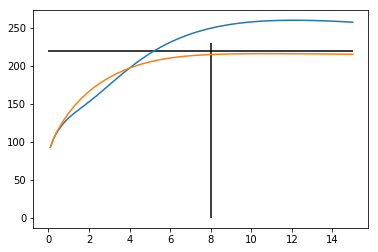

In [38]:
plt.plot(R,Vc_tot_v4(R,params_Model_I))
plt.plot(R,Vc_tot_v6(R,params_Model_I))
plt.hlines(220,0,15)
plt.vlines(8,0.,230)

In [46]:
def Vc_tot_v7(R,parameters):
    R_d,Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_simps(R,R_d,Sigma_d_SD) -G*Sigma_g_ISM_I*np.sqrt(2)*Inte_array_I/0.08
    return np.sqrt(suma)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


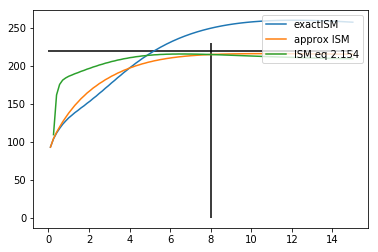

In [48]:
plt.plot(R,Vc_tot_v4(R,params_Model_I),label='exactISM')
plt.plot(R,Vc_tot_v6(R,params_Model_I),label='approx ISM')
plt.plot(R,Vc_tot_v7(R,params_Model_I),label='ISM eq 2.154')
plt.hlines(220,0,15)
plt.vlines(8,0.,230)
plt.legend(loc='upper right', prop={'size':10})

In [49]:
temp1=-G*Sigma_g_ISM_I*np.sqrt(2)*Inte_array_I/0.08
w1=temp1<0
temp1[w1]=0
print temp1

[    0.          1102.12166681 13510.34754342 16526.33671549
 16920.42548107 16459.59611612 15725.42738703 14934.88089739
 14172.6862616  13470.25028622 12836.16761991 12269.14987608
 11763.84224355 11313.52290756 10911.35635117 10550.95030998
 10226.57208984  9933.19845909  9666.48715163  9422.71474656
  9198.70365785  8991.74926755  8799.55243296  8620.15945229
  8451.90964224  8293.39043271  8143.39912038  8000.91043391
  7865.04925878  7735.0675338   7610.32484982  7490.27215203
  7374.43792794  7262.41660692  7153.85876323  7048.4628281
  6945.96807216  6846.14863535  6748.80848796  6653.7771886
  6560.90616152  6470.06562653  6381.14192176  6294.03526804
  6208.65774218  6124.93172697  6042.78838968  5962.16649666
  5883.01138002  5805.27397496  5728.9101172   5653.87979059
  5580.14665525  5507.67744153  5436.44159352  5366.41087371
  5297.55905243  5229.86164329  5163.29564609  5097.8393777
  5033.47222929  4970.17461978  4907.9277849   4846.71367727
  4786.51491522  4727.31465

In [50]:
def Vc_tot_v8(R,parameters):
    R_d,Sigma_d_SD,rho_b,a_h,rho_h,alpha_h,beta_h,Sigma_g_ISM = parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_simps(R,R_d,Sigma_d_SD) + temp1
    return np.sqrt(suma)

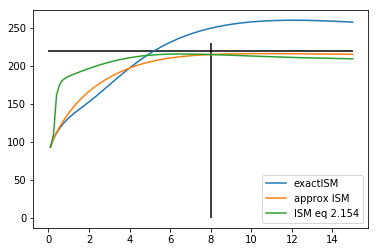

In [52]:
plt.plot(R,Vc_tot_v4(R,params_Model_I),label='exactISM')
plt.plot(R,Vc_tot_v6(R,params_Model_I),label='approx ISM')
plt.plot(R,Vc_tot_v8(R,params_Model_I),label='ISM eq 2.154')
plt.hlines(220,0,15)
plt.vlines(8,0.,230)
plt.legend(loc='lower right', prop={'size':10})

In [53]:
def Integral_ISM_II(x,a,zp,R,R_d=R_d_II,z=0,R_m=R_m,z_g=0.08):
    F = x*np.exp(-(a*x)/(2.*R_d)-R_m/(a*x))/np.sqrt(x**2. - 1.)
    u1 = (z-zp)**2. + (a+R)**2.
    u2 = (z-zp)**2. + (a-R)**2.
    d = R**2. -z**2. -a**2. + np.sqrt(u1)*np.sqrt(u2)
    t1 = -(a-R)**2./u2**(3./2.) + 1./np.sqrt(u2) + 1./np.sqrt(u1) - (a+R)**2./(u1)**(3./2.)
    t2 = ((a+R)/np.sqrt(u1) - (a-R)/np.sqrt(u2))*(2.*R - ((a-R)*np.sqrt(u1))/np.sqrt(u2) + ((a+R)*np.sqrt(u2))/np.sqrt(u1))
    G1 = t1/np.sqrt(d) - t2/(2.*d**(3./2.))
    return R*np.exp(-abs(zp)/z_g)*G1*F

In [54]:
Inte_ISM_II = []
for i in range (0,len(R)):
    integrand = lambda x,a,zp: Integral_ISM_II(x,a,zp,R[i])
    resultado = integrate.tplquad(integrand,-np.inf,np.inf,lambda zp: 0.1, lambda zp: np.inf,lambda zp,a: 1.,lambda zp,a: np.inf)[0]
    Inte_ISM_II.append(resultado)
print Inte_ISM_II

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting

KeyboardInterrupt: 